In [1]:
%store

Stored variables and their in-db values:
__importClassification             -> IPython.macro.Macro(u"# Handle table-like data and
__importRegression                 -> IPython.macro.Macro(u"# Handle table-like data and


In [1]:
%store -r __importRegression

In [2]:
__importRegression

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
endMonth = 34
fnameTest = '../input/validation/test_' + str(endMonth) + '.csv'
fnameTrain = '../input/validation/train_' + str(endMonth) + '.csv'
#train = pd.read_csv(fnameTrain)
#test = pd.read_csv(fnameTest)
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
items = pd.read_csv("../input/items.csv")
categories = pd.read_csv("../input/item_categories.csv")

print (train.shape, test.shape, items.shape, categories.shape)

((2935849, 6), (214200, 3), (22170, 3), (84, 2))


labels = test.pop('item_cnt_day')

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Let's find total sales per shop

In [5]:
train_shop = train.copy()

In [6]:
train_shop.drop(['date', 'date_block_num', 'item_price', 'item_id'], axis=1, inplace=True)

In [7]:
train_shop.head()

,shop_id,item_cnt_day
0,59,1.0
1,25,1.0
2,25,-1.0
3,25,1.0
4,25,1.0


In [8]:
train_shop = train_shop.groupby(['shop_id'], as_index=False).agg({'item_cnt_day':sum})

In [9]:
train_shop['shop_total_sales'] = train_shop.item_cnt_day

In [11]:
train_shop.drop('item_cnt_day', axis=1, inplace=True)

In [13]:
train_shop.head()

,shop_id,shop_total_sales
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0


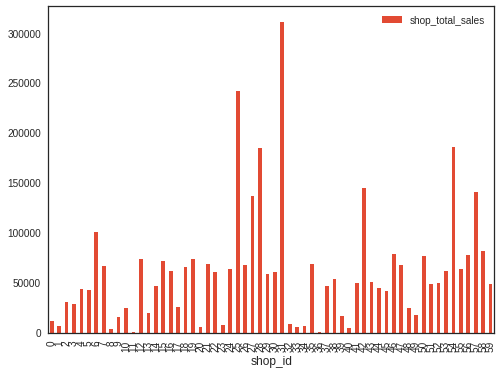

In [15]:
train_shop.plot(x='shop_id', y='shop_total_sales', kind='bar')

In [16]:
train = pd.merge(train, train_shop, left_on='shop_id', right_on='shop_id')

In [17]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_total_sales
0,02.01.2013,0,59,22154,999.0,1.0,48993.0
1,10.01.2013,0,59,22151,399.0,1.0,48993.0
2,04.01.2013,0,59,5603,699.0,1.0,48993.0
3,19.01.2013,0,59,5587,199.0,2.0,48993.0
4,31.01.2013,0,59,5613,5571.0,1.0,48993.0


In [18]:
train_items = train.copy()

In [20]:
train_items.drop(['date', 'date_block_num', 'shop_id', 'item_price', 'shop_total_sales'], axis=1, inplace=True)

In [21]:
train_items.head()

,item_id,item_cnt_day
0,22154,1.0
1,22151,1.0
2,5603,1.0
3,5587,2.0
4,5613,1.0


In [23]:
train_items = train_items.groupby(['item_id'], as_index=False).agg({'item_cnt_day':sum})

In [24]:
train_items['item_total_sales'] = train_items.item_cnt_day
train_items.drop('item_cnt_day', axis=1, inplace=True)

In [25]:
train_items.head()

,item_id,item_total_sales
0,0,1.0
1,1,6.0
2,2,2.0
3,3,2.0
4,4,1.0


In [26]:
train_items.describe()

,item_id,item_total_sales
count,21807.000000,21807.00000
mean,11098.699271,167.29518
std,6397.059362,1366.22019
min,0.000000,-11.00000
25%,5551.500000,7.00000
50%,11105.000000,33.00000
75%,16647.500000,124.00000
max,22169.000000,187642.00000


In [27]:
train = pd.merge(train, train_items, left_on='item_id', right_on='item_id')

In [29]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_total_sales,item_total_sales
0,02.01.2013,0,59,22154,999.0,1.0,48993.0,59.0
1,02.01.2013,0,25,22154,999.0,1.0,241920.0,59.0
2,03.01.2013,0,25,22154,999.0,1.0,241920.0,59.0
3,20.01.2013,0,25,22154,999.0,1.0,241920.0,59.0
4,23.01.2013,0,25,22154,999.0,1.0,241920.0,59.0
5,26.01.2013,0,25,22154,999.0,1.0,241920.0,59.0
6,27.08.2015,31,25,22154,299.0,1.0,241920.0,59.0
7,02.09.2015,32,25,22154,299.0,1.0,241920.0,59.0
8,23.01.2013,0,24,22154,999.0,1.0,63886.0,59.0
9,10.10.2015,33,24,22154,299.0,1.0,63886.0,59.0


Let's find sales per season.
- Fall: months 09, 10, 11
- Winter: months 12, 01, 02
- Spring: months 03, 04, 05
- Summer: months 06, 07, 08

In [30]:
train['month'] = train.date_block_num % 12 + 1

In [32]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_total_sales,item_total_sales,month
0,02.01.2013,0,59,22154,999.0,1.0,48993.0,59.0,1
1,02.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1
2,03.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1
3,20.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1
4,23.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1
5,26.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1
6,27.08.2015,31,25,22154,299.0,1.0,241920.0,59.0,8
7,02.09.2015,32,25,22154,299.0,1.0,241920.0,59.0,9
8,23.01.2013,0,24,22154,999.0,1.0,63886.0,59.0,1
9,10.10.2015,33,24,22154,299.0,1.0,63886.0,59.0,10


In [33]:
def season(x):
    if x in [9, 10, 11]:
        return 1 # Fall
    if x in [12, 1, 2]:
        return 2 # Winter
    if x in [3, 4, 5]:
        return 3 # Spring
    if x in [6, 7, 8]:
        return 4 # Summer

In [34]:
train['season'] = train.month.apply(season)

In [36]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_total_sales,item_total_sales,month,season
0,02.01.2013,0,59,22154,999.0,1.0,48993.0,59.0,1,2
1,02.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1,2
2,03.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1,2
3,20.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1,2
4,23.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1,2
5,26.01.2013,0,25,22154,999.0,1.0,241920.0,59.0,1,2
6,27.08.2015,31,25,22154,299.0,1.0,241920.0,59.0,8,4
7,02.09.2015,32,25,22154,299.0,1.0,241920.0,59.0,9,1
8,23.01.2013,0,24,22154,999.0,1.0,63886.0,59.0,1,2
9,10.10.2015,33,24,22154,299.0,1.0,63886.0,59.0,10,1
